<a href="https://colab.research.google.com/github/Shalini1142/Salary_prediction-based-on-experience/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv file

In [28]:
data=pd.read_csv("/content/Salary_Data.csv")

check if the data already stored in the data variable

In [29]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


first five rows of the data above


see coloumns in data. returns coloums in dataset

In [30]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

mean, sd, minimum value of dataset

In [31]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [32]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


check for coloumns so use .any()

In [33]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [34]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

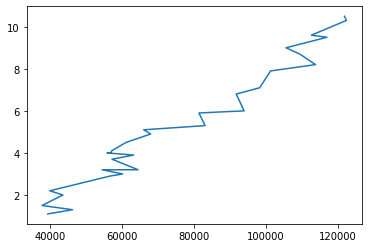

In [35]:
plt.plot(data['Salary'],data['YearsExperience'])


##spliting dataset to train and testing


In [36]:
from sklearn.model_selection import train_test_split
x = data.drop('Salary',axis = 1)

In [37]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [38]:
y=data['Salary']

In [39]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

#import linear regression from sklearn


In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [41]:
from sklearn.linear_model import LinearRegression 

L=LinearRegression()

In [42]:
L.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

check prediction for class

In [43]:
ytest

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64

In [44]:
y_pred=L.predict(xtest)
y_pred


array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [45]:
print(L.score(xtest, ytest)) 

0.9024461774180497


In [46]:
#getting the score of the regression
L.score(xtrain, ytrain)

0.9645401573418146

accuracy


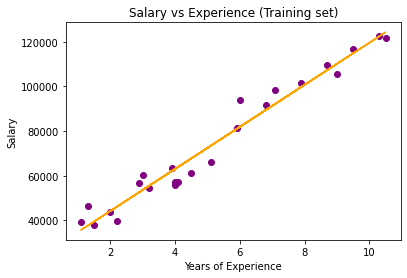

In [47]:
#Visualizing the training set results
plt.scatter(xtrain, ytrain, color="purple")
plt.plot(xtrain, L.predict(xtrain), color = "orange")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

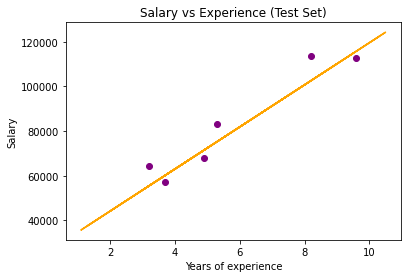

In [48]:
#Visualizing the test set results
plt.scatter(xtest, ytest, color = "purple")
plt.plot(xtrain, L.predict(xtrain), color = "orange")
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [49]:
new_salary_pred = L.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [166678.81285724]
